# [Self-supervised Pre-Training Model](https://glanceyes.com/entry/Self-Supervised-Model%EC%9D%B8-GPT-1%EA%B3%BC-BERT-%EB%B6%84%EC%84%9D-%EB%B0%8F-%EB%B9%84%EA%B5%90#toc-link-3)
transformer의 self-attention block을 기반으로 하는 대표적인 self-supervised pre-training model인 GPT과 BERT에 관해 알아보고자 한다.

## Self-supervised Learning
- Self-supervised learning란, 이는 레이블이 주어지지 않은 데이터를 가지고 사용자가 정한 pretext task를 통해 pre-training을 진행하고, 기학습이 완료된 모델을 여러 다른 downstream task에 fine-tuning하여 사용하고자 transfer learning을 수행한다.
- Self-supervised learning에서 pre-training을 위해 사용하는 데이터 자체는 레이블이 주어지지 않은 데이터이지만, pretext task을 목표로 pre-training 하는 과정 자체에서는 pretext task의 목적에 맞게 데이터에 레이블을 새롭게 부여하는 방법 등 supervision을 직접 만든다.
- 다양한 문장으로 이루어진 긴 지문을 가지고 pretext task을 목적으로 pre-training하는 사례를 들면 해당 지문의 일부를 일정 확률에 의해 임의로 마스킹하고, 마스킹된 단어에 원래 어떠한 단어가 들어가야 하는지를 지도학습을 하는 것이다.
- 또한 지문으로 주어지는 여러 문장 사이의 논리적 관계를 추론하기 위해 모델의 입력 sequence에 문장간의 관계를 예측하기 위한 새로운 token을 하나 추가하여 문장들이 서로 모순인지 아닌지를 지도학습하는 것도 속한다.
- Self-supervised learning에서 사용하는 데이터 자체에는 레이블이 처음이 주어지지 않으므로 비지도학습(unsupervised learning)의 일종이라고 대개 말하지만, 사실 모델이 pre-training 과정에서 자신의 pretext task 목적에 맞게 레이블이 부여되지 않은 데이터를 일부 변형 또는 가공하여 스스로 지도학습을 수행한다고 볼 수 있다.

# [GPT(Generative Pre-Training)](https://glanceyes.com/entry/Self-Supervised-Model%EC%9D%B8-GPT-1%EA%B3%BC-BERT-%EB%B6%84%EC%84%9D-%EB%B0%8F-%EB%B9%84%EA%B5%90#toc-link-5)
- GPT(Generative Pre-trained Transformer)는 테슬라의 창업자인 일론 머스크가 세운 비영리 연구 기관인 openAI에서 나온 모델이며, 최근 GPT-2부터 GPT-3까지 이어지는 모델을 통해 탁월한 자연어 생성 성능을 보이고 있다.

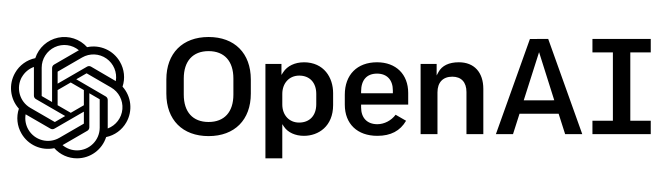

## GPT-1 특징
- GPT-1은 12개의 transformer block을 사용했으며, encoder 없이 decoder만을 가진다.
- 또한 transformer block의 masked multi self-attention block에서는 12개의 head를 사용하고, 인코딩 벡터의 차원을 768로 만들어 사용한다.
- 그리고 활성 함수(Activation Function)으로 GELU를 사용한 점이 특징이다.

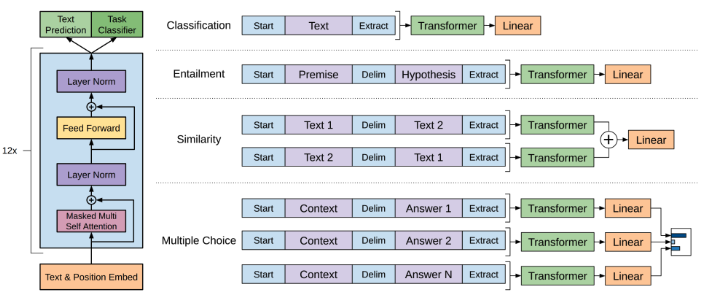

## GPT-1의 Pre-Training 응용

### 감정 분석(Sentimental Analysis)
- 감정 분석(Sentimental analysis)과 같은 classification task를 수행할 경우 어떤 문장이 주어졌을 때 `<Start>` token을 문장의 맨 앞에 넣고, 마찬가지로 문장이 끝나는 `<end>` token으로서 좀 더 특별한 역할을 하는 `<Extract>` token을 문장의 맨 뒤에 붙인다.
- 그리고 문장을 GPT-1 모델을 통해 인코딩한 후 나온 최종 인코딩 결과에서 `<Extract>` token에 해당되는 인코딩 벡터를 output layer의 입력 벡터로 넣어줌으로써 문장을 통한 감정 분석 등 분류 작업을 진행할 수 있다.

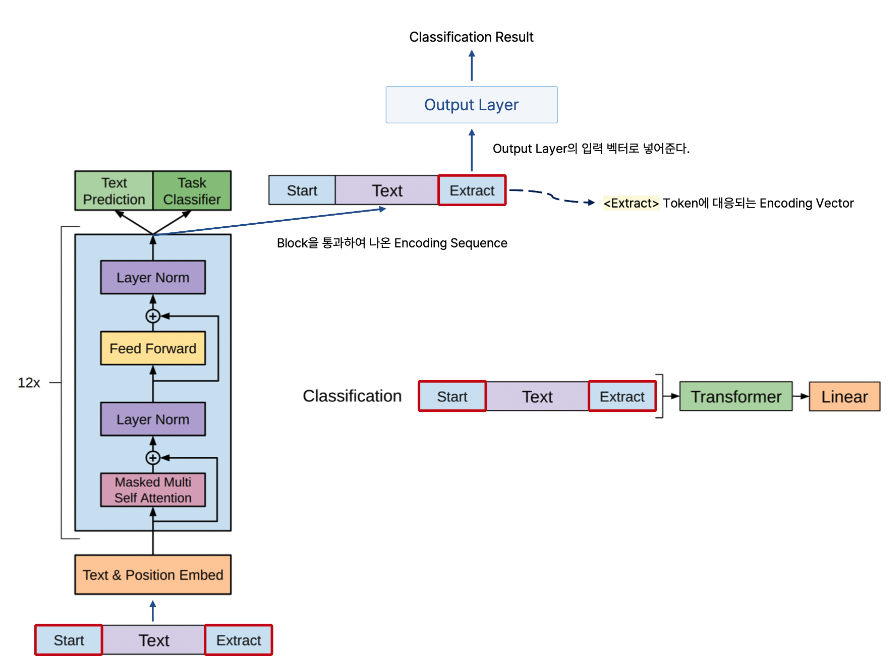

### Entailment Task
또한 전제가 주어지고 이를 통해 주어지는 가설의 참 또는 거짓을 판별하는 entailment task에서도 적용할 수 있다.

- 예를 들어, "섬 A에는 사슴이 현재 50마리가 산다."라는 문장이 주어졌을 때, "섬 A의 들판에는 현재 50마리를 넘는 사슴이 있을 수가 없다."라는 문장은 참이어야 하는 논리적인 내포관계를 바르게 찾아야 한다.
- 이러한 task에서는 다수의 문장으로 이루어진 문장을 입력으로 받아 예측을 수행해야 하는데, 이를 위해 GPT-1 모델에서는 여러 문장을 전제와 가설을 이어서 하나의 문장으로 만들되 문장 사이에 `<Delimiter>`라는 특수 문자인 구분자를 추가한다.
- 또한 분류 문제와 마찬가지로 문장의 처음과 마지막에는 각각 `<Start>`와 `<Extract>` token을 추가한다.
- 이처럼 합친 문장을 모델에 넣어서 인코딩하여 출력되는 문장에서 `<Extract>` token에 해당되는 벡터를 output layer에 통과시켜서 주어진 입력 문장이 논리적으로 귀결되는지 아니면 모순되는지를 분류하는 task를 수행할 수 있다.
- 결국 `<Extractor>`는 입력으로 주어질 때 마지막으로 추가하는 단순한 token인 것처럼 보이지만, 모델에 통과시켜서 문장을 잘 이해하고 감정 표현을 제대로 내릴 수 있는지 또는 문장 사이의 논리적 관계에 모순이 있는지를 판단할 수 있는 query로 사용되므로 downstream task에 필요로 하는 여러 정보를 주어진 입력 문장으로부터 추출할 수 있다.

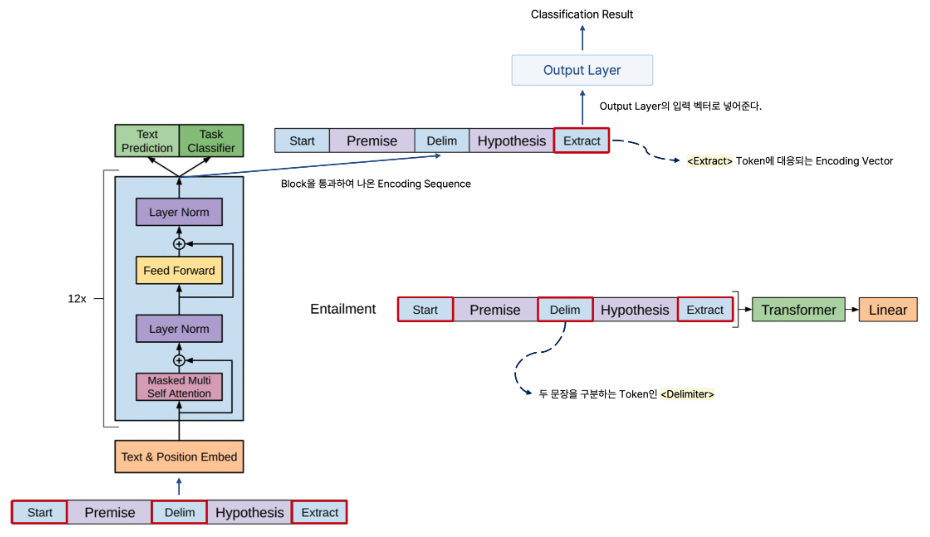

### Multiple Choice
이외 여러 문장이 존재할 때 두 문장 간의 유사도를 측정하는 similarity task나 다수의 입력 문장에서 주어진 목적에 맞는 가장 적절한 문장을 선택하는 multiple chocie에도 GPT-1 모델을 적용할 수 있다.

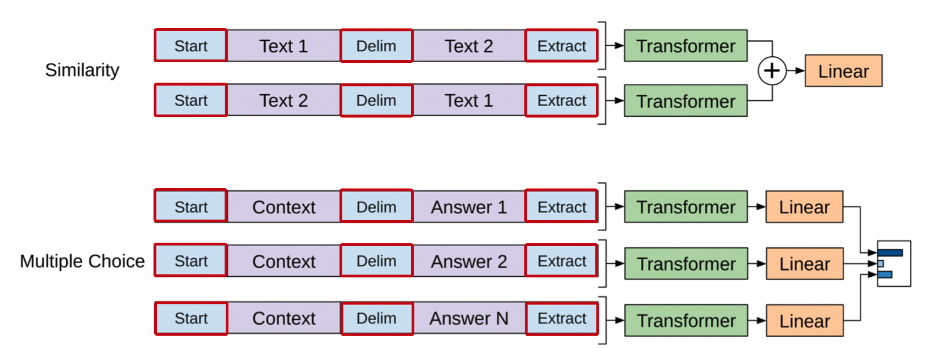

# [BERT](https://happy-obok.tistory.com/23)
> BERT(Bidirectional Encoder Representations from Transformers)는 2018년에 구글이 공개한 사전 훈련된 모델입니다.    
> BERT는 등장과 동시에 수많은 NLP 테스크에서 최고 성능을 보여주면서 명실공히 NLP의 한 획을 그은 모델로 평가받고 있습니다.

## Transformer 기반의 BERT
> BERT는 Transformer의 인코더-디코더 중 인코더만 사용합니다.

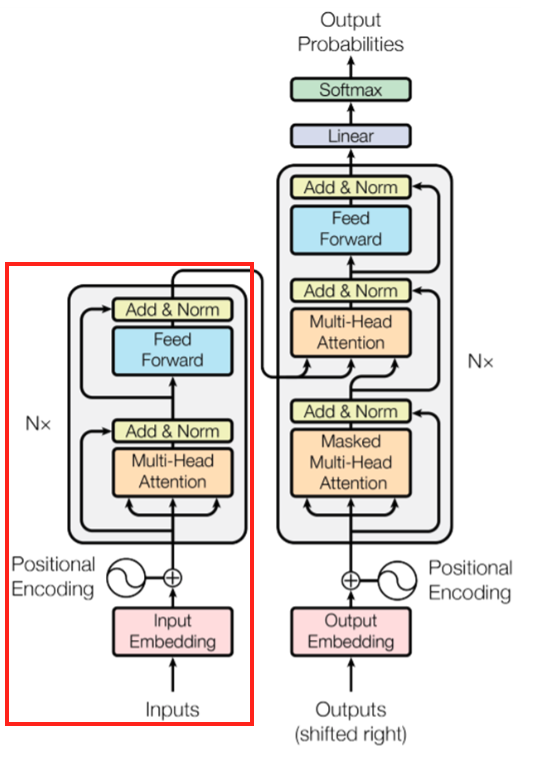

## BERT is a Pre-Trained Model

- 그림과 같이 BERT를 이용한 자연어 처리는 2단계로 진행되며 거대 Encoder가 입력 문장들을 임베딩하여 언어를 모델링하는 Pre-training 과정과 이를 Fine-Tuning하여 여러 자연어 처리 Task를 수행하는 과정입니다.
- BERT는 두 가지 방식의 Pre-Training 구조를 가집니다.
  - Masked Language Model(MLM)
  - Next Sentence Prediction(NSP)

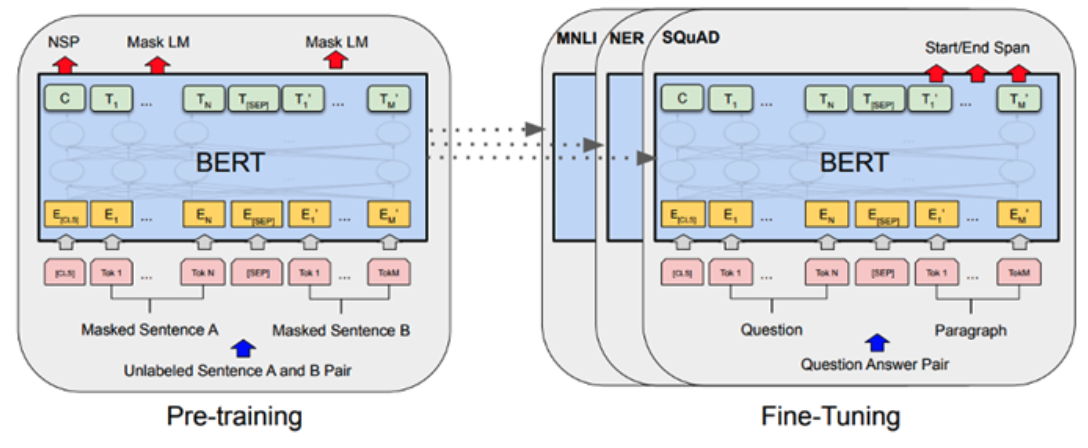

### MLM(Masked Language Model)
-  입력 문장에서 임의로 토큰을 버리고(Mask), 그 토큰을 맞추는 방식으로 학습을 진행합니다.
- 즉, 단어 단위로 학습하는 모델입니다.

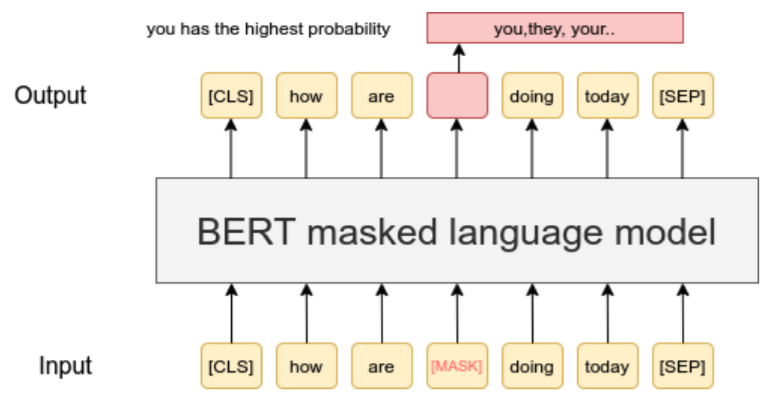

### NSP(Next Setence Prediction)
  -  두 문장이 주어졌을 때, 두 문장의 순서를 예측하는 방식입니다.
  - 즉, 문장 단위로 학습하는 모델입니다.

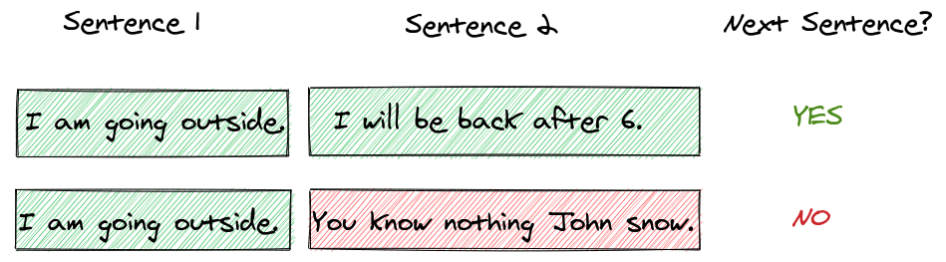

## BERT: Input(입력)
> Token Embedding + Segment Embedding + Position Embedding  
- `[CLS]`: 문장 분류를 위한 특수 토큰
- `[SEP]`: 문장 구분을 위한 토큰. 각 문장의 끝에 붙임

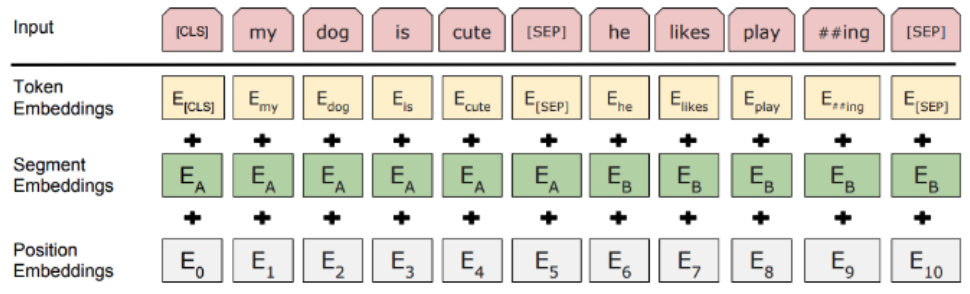

- Token Embedding
> Word Piece 임베딩 방식 사용, 각 Char(문자) 단위로 임베딩을 하고, 자주 등장하면서 가장 긴 길이의 sub-word를 하나의 단위로 만듭니다. 자주 등장하지 않는 단어는 다시 sub-word로 만듭니다. 이는 이전에 자주 등장하지 않았던 단어를 모조리 'OOV' 처리하여 모델의 성능을 저하했던 'OOV' 문제도 해결 할 수 있습니다.     
> OOV(Out Of Vocabulary): 단어 사전에 없는 문제. 일반적으로 `<UNK>` unknown token을 반환한다.
  
- Segment Embedding
> 문장을 구분하기 위한 임베딩
- Position Embedding
> 단어 위치를 나타내는 임베딩  

# BERT vs GPT

- BERT
  - BERT는 문장 의미 침 감정 분석 추출과 관련된 task에 유리하다.
  - BERT는 Bi-direction    
  > "나는 개발이 재미있습니다."에서 "개발이"
를 예측하기 위해서 "나는", "재미있습니다"를 이용한다.

- GPT
  - GPT는 문장 생성과 관련된 task에 유리하다.
  - GPT는 one-direction    
  > "나는 개발이 재미있습니다."에서 "개발이"
를 예측하기 위해서 "나는"
만을 이용한다.

# [transformers](https://huggingface.co/)

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 71.9 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

## BERT 실습

In [ ]:
classifier = pipeline(
    "sentiment-analysis", model="sangrimlee/bert-base-multilingual-cased-nsmc"
)

In [ ]:
classifier("흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나.")

[{'label': 'negative', 'score': 0.9642568230628967}]

In [ ]:
classifier("액션이 없는데도 재미 있는 몇안되는 영화")

[{'label': 'positive', 'score': 0.9970554113388062}]

- 저장

In [ ]:
classifier.save_pretrained("sentiment_pipeline")

- 불러오기

In [ ]:
classifier = pipeline("sentiment-analysis", model = "sentiment_pipeline")
classifier('오늘 너무 행복하다')

[{'label': 'positive', 'score': 0.9830362200737}]

- Fill mask

In [ ]:
fill_mask = pipeline("fill-mask", model = "klue/bert-base")

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
fill_mask("오늘 저녁은 [MASK] 먹자",top_k=10)

[{'score': 0.07854149490594864,
  'token': 677,
  'token_str': '꼭',
  'sequence': '오늘 저녁은 꼭 먹자'},
 {'score': 0.06891655921936035,
  'token': 1521,
  'token_str': '잘',
  'sequence': '오늘 저녁은 잘 먹자'},
 {'score': 0.06734155118465424,
  'token': 23698,
  'token_str': '이걸로',
  'sequence': '오늘 저녁은 이걸로 먹자'},
 {'score': 0.0492863655090332,
  'token': 1,
  'token_str': '[UNK]',
  'sequence': '오늘 저녁은 먹자'},
 {'score': 0.037069182842969894,
  'token': 1097,
  'token_str': '뭐',
  'sequence': '오늘 저녁은 뭐 먹자'},
 {'score': 0.03490210324525833,
  'token': 1099,
  'token_str': '뭘',
  'sequence': '오늘 저녁은 뭘 먹자'},
 {'score': 0.03136727586388588,
  'token': 3737,
  'token_str': '이렇게',
  'sequence': '오늘 저녁은 이렇게 먹자'},
 {'score': 0.02197464182972908,
  'token': 10725,
  'token_str': '떡볶이',
  'sequence': '오늘 저녁은 떡볶이 먹자'},
 {'score': 0.020356040447950363,
  'token': 4239,
  'token_str': '제대로',
  'sequence': '오늘 저녁은 제대로 먹자'},
 {'score': 0.019041113555431366,
  'token': 3842,
  'token_str': '어떻게',
  'sequence': '오늘 저녁

- Question & Answering

In [ ]:
question_answering = pipeline("question-answering",model= "ainize/klue-bert-base-mrc")

In [ ]:
question = "대한민국의 수도는?"
context = """
서울특별시는 대한민국의 수도, 최고(最古) 도시, 최대 도시다.[19]

지방자치법의 특별법[20]으로 법률상 대한민국 제1의 도시로 규정되어 있다. 현재 대한민국 유일 특별시이며, 수장인 서울특별시장은 대한민국의 광역자치단체장 중 유일하게 장관급 대우를 받으며 국무회의 참여권 및 발언권이 있다.[21][22] 서울은 한국 제2의 도시인 부산보다도 인구가 약 3배 더 많은 명실상부한 한반도의 종주도시이다.

역사적으로도 백제, 조선, 대한제국의 고도이자 현 대한민국의 수도로서 중요성이 높다. 기원전 18년 백제가 현 송파·강동 지역에 도읍을 정한 후 492년간 한성백제 시대가 이어졌다. 이후 475년 고구려가 한성을 함락하였는데, 북쪽에 기반을 둔 국가인 고구려는 기존 백제의 한성에서 북쪽으로 한강을 건너 현 광진·성동·구리 일대를 거점으로 삼아 고구려의 북한산군 남평양으로 지정했고, 이후 서울은 강북 지역을 중심으로 발전하였다. 이후 553년 신라가 이 지역을 차지하여 신라의 한산주 한양군이 되었다. 이후 고려시대에는 약 250년간[23] 개경 이남의 남경이었다. 조선시대에는 510년 동안[24] 조선 및 대한제국의 수도 한성부였고, 이어 70여년간[25] 대한민국의 수도인 서울로서 지위를 차지하는 도시로 한국사에서 도합 1070여년간 수도로서 기능을 하였고 부수도 기간까지 합치면 1300년이 넘는 유구한 역사의 고도이다.[26]
"""

In [ ]:
question_answering(question,context)

{'score': 0.641891360282898, 'start': 1, 'end': 7, 'answer': '서울특별시는'}

## GPT 실습  

In [ ]:
text_generation = pipeline("text-generation",model= "skt/kogpt2-base-v2")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
text_generation("딥러닝")

/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1186: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1273: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': '딥러닝 콘텐츠 개발을 위한 지원과 스타트업 육성을 위해 다양한 프로그램을 제공해왔다”며 “향후에도 기업 및 스타트업 성장을 위해 노력하고, 보다 혁신적인 아이디어가 현실화할 수 있도록 적극 지원할 것”이라고 밝혔다. 미국'}]

# 추가학습 자료
- [대화형 AI](https://mindscale.kr/course/nlg/1/)
- [koGPT2 챗봇 만들기](https://wikidocs.net/157001)